In [27]:
import joblib
import pandas as pd
from quadratic_weighted_kappa import quadratic_weighted_kappa
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [53]:
scores = pd.read_csv('../training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y =  joblib.load('score_asap7')
model_score = joblib.load('score_model_normalized')

In [54]:
scores = scores[scores['essay_set'] == 7]
scores = scores[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']]
len(scores)

1569

In [55]:
scores

,rater1_domain1,rater2_domain1,rater3_domain1
10686,8,7,NaN
10687,6,7,NaN
10688,7,8,NaN
10689,8,9,NaN
10690,7,6,NaN
...,...,...,...
12250,6,6,NaN
12251,9,7,NaN
12252,11,8,NaN
12253,12,10,NaN


### Check how many rater3 involved (measuring disagreement between rater 1 and rater 2)

In [56]:
scores.count()

rater1_domain1    1569
rater2_domain1    1569
rater3_domain1       0
dtype: int64

### first reset dataframe index to avoid NaN

In [57]:
scores = scores.reset_index()

In [58]:
scores = scores[['rater1_domain1', 'rater2_domain1']]
scores['model_score'] = model_score
scores['y'] = y
scores

,rater1_domain1,rater2_domain1,model_score,y
0,8,7,11.0,15
1,6,7,12.0,13
2,7,8,14.0,15
3,8,9,19.0,17
4,7,6,15.0,13
...,...,...,...,...
1564,6,6,12.0,12
1565,9,7,16.0,16
1566,11,8,16.0,19
1567,12,10,21.0,22


In [59]:
quadratic_weighted_kappa(y, model_score)

0.7780350409677778

In [60]:
pearsonr(y, model_score)

(0.7982477541107671, 0.0)

In [61]:
quadratic_weighted_kappa(scores['rater1_domain1'], scores['rater2_domain1'])

0.7214784742548883

In [62]:
pearsonr(scores['rater1_domain1'], scores['rater2_domain1'])

(0.7220063136152102, 6.027393020509001e-253)

In [63]:
rater1_score = scores['rater1_domain1']
rater2_score = scores['rater2_domain1']

In [64]:
print(y)

0       15
1       13
2       15
3       17
4       13
        ..
1564    12
1565    16
1566    19
1567    22
1568    15
Name: domain1_score, Length: 1569, dtype: int64


In [65]:
#scores.to_excel('asap6_summary.xlsx')

In [66]:
discrepancy_r1r2 = rater1_score == rater2_score
type(discrepancy_r1r2)

pandas.core.series.Series

In [16]:
diff = rater1_score - rater2_score
diff_abs = list(map(abs, diff))
diff

0       1
1      -1
2      -1
3      -1
4       1
       ..
1564    0
1565    2
1566    3
1567    2
1568   -1
Length: 1569, dtype: int64

In [17]:
diff_abs[-5:]

[0, 2, 3, 2, 1]

In [18]:
scores['diff_r1r2'] = diff_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2
0,8,7,11.0,15,1
1,6,7,12.0,13,1
2,7,8,14.0,15,1
3,8,9,19.0,17,1
4,7,6,15.0,13,1
...,...,...,...,...,...
1564,6,6,12.0,12,0
1565,9,7,16.0,16,2
1566,11,8,16.0,19,3
1567,12,10,21.0,22,2


In [19]:
diff_y_model = model_score - y
diff_y_model_abs = list(map(abs, diff_y_model))
diff_y_model

0      -4.0
1      -1.0
2      -1.0
3       2.0
4       2.0
       ... 
1564    0.0
1565    0.0
1566   -3.0
1567   -1.0
1568    1.0
Name: domain1_score, Length: 1569, dtype: float64

In [20]:
diff_y_model_abs = list(map(int, diff_y_model_abs))
diff_y_model_abs[:3]

[4, 1, 1]

In [21]:
scores['diff_model_y'] = diff_y_model_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,8,7,11.0,15,1,4
1,6,7,12.0,13,1,1
2,7,8,14.0,15,1,1
3,8,9,19.0,17,1,2
4,7,6,15.0,13,1,2
...,...,...,...,...,...,...
1564,6,6,12.0,12,0,0
1565,9,7,16.0,16,2,0
1566,11,8,16.0,19,3,3
1567,12,10,21.0,22,2,1


In [23]:
scores.to_excel('asap7_summary.xlsx')

In [24]:
diff_r1r2 = list(scores['diff_r1r2'])
diff_model_y = list(scores['diff_model_y'])

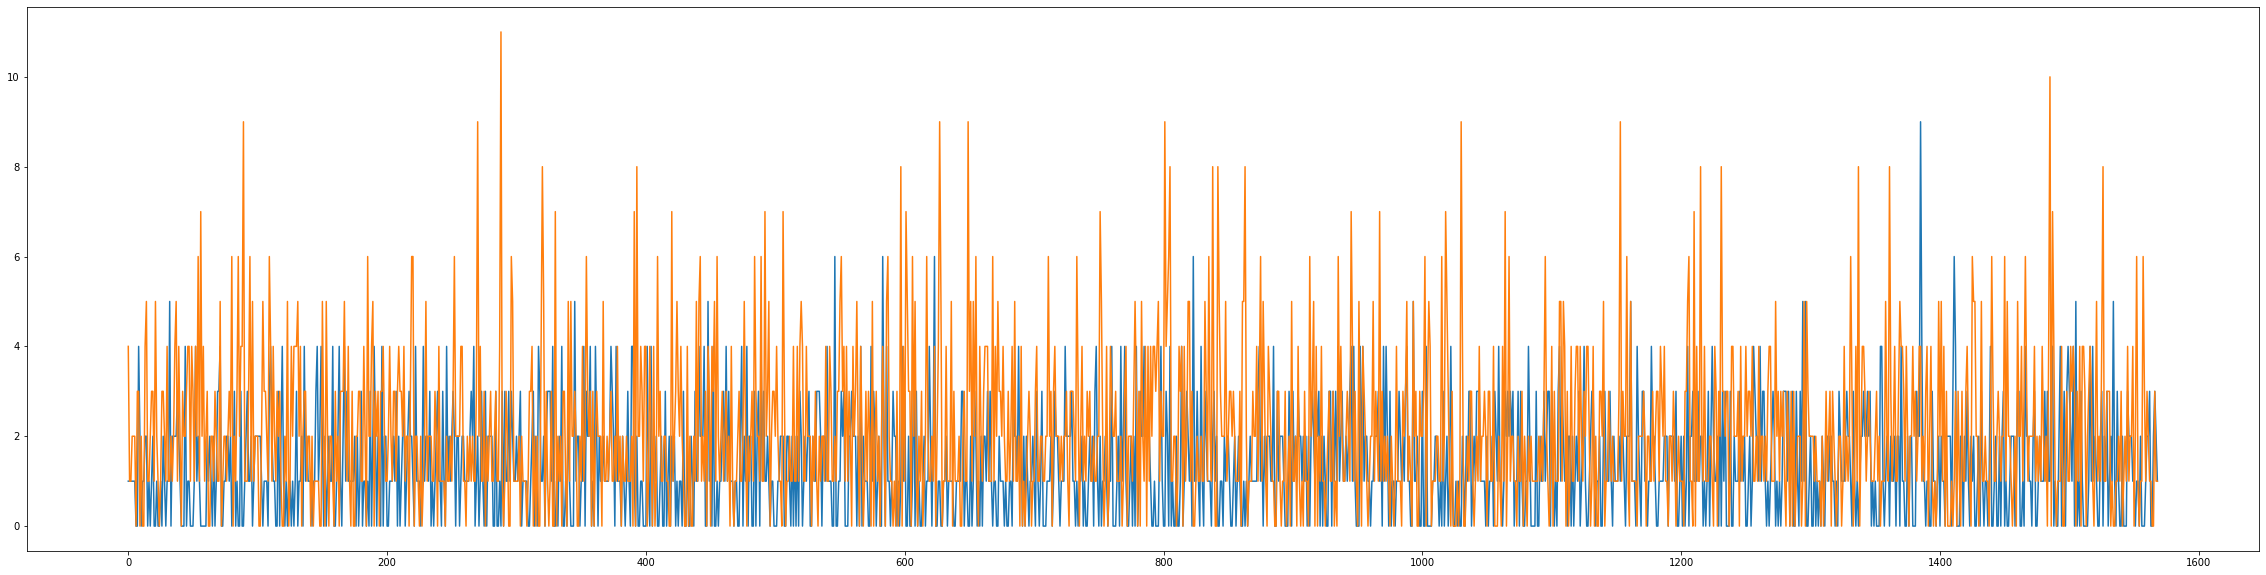

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
plt.plot(diff_r1r2)
plt.plot(diff_model_y)
plt.show()

In [26]:
diff = np.array(diff_r1r2) - np.array(diff_model_y)
diff_abs = list(map(abs,diff))
diff

array([-3,  0,  0, ...,  0,  1,  0])

In [27]:
diff_abs[-3:]

[0, 1, 0]

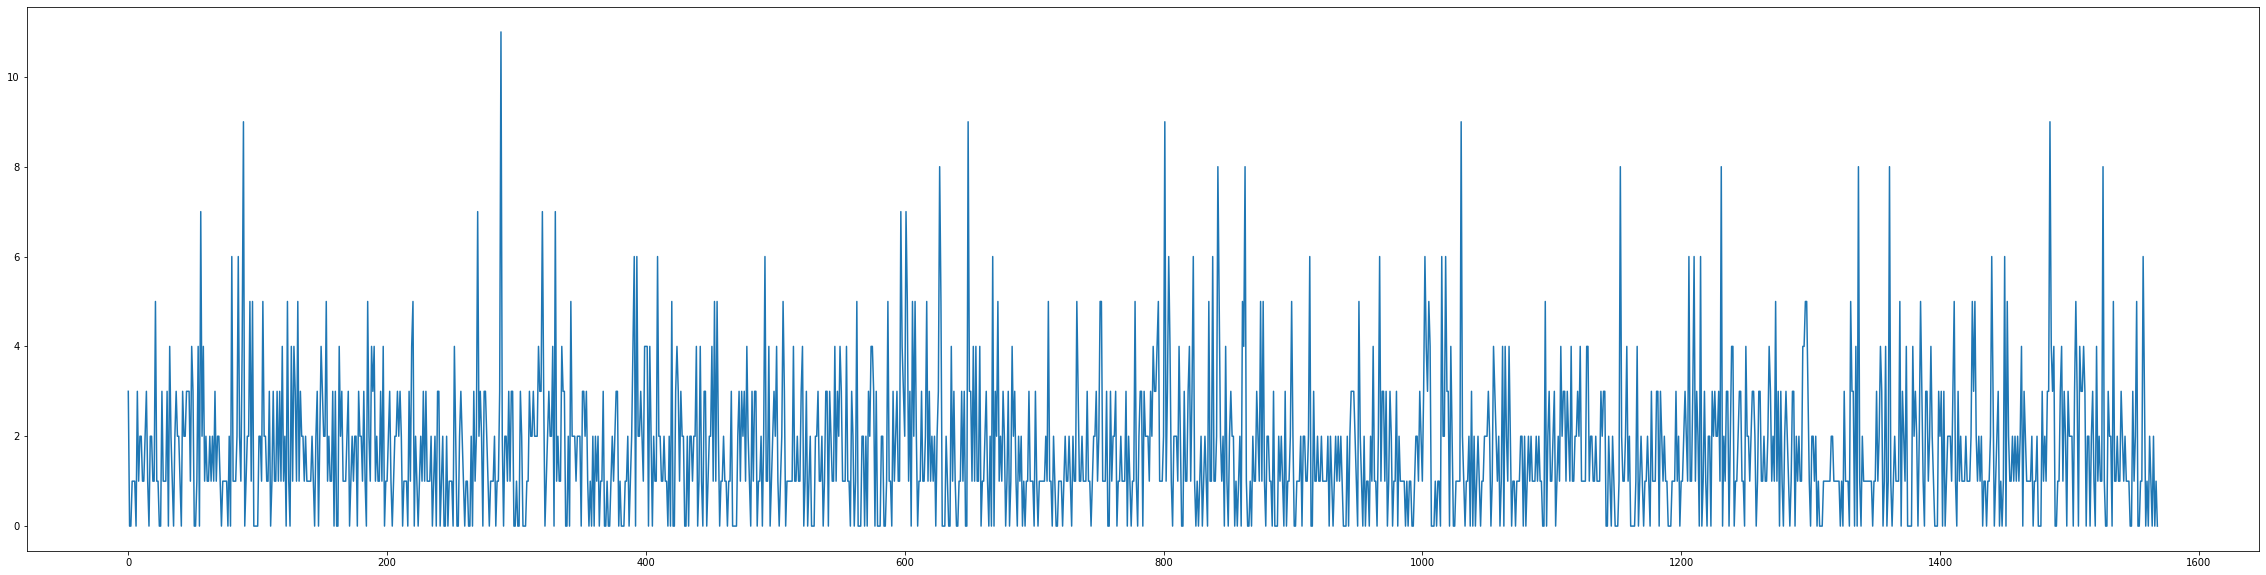

In [28]:
plt.figure(figsize=(40,10))
plt.plot(diff_abs)
plt.show()

In [29]:
from collections import Counter
Counter(diff_abs)

Counter({3: 216,
         0: 321,
         1: 525,
         2: 332,
         5: 50,
         4: 84,
         7: 6,
         6: 21,
         9: 5,
         11: 1,
         8: 8})

In [30]:
bad_scores = scores[scores['diff_model_y'] != 0]
good_scores = scores[scores['diff_model_y'] == 0]

In [31]:
bad_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,8,7,11.0,15,1,4
1,6,7,12.0,13,1,1
2,7,8,14.0,15,1,1
3,8,9,19.0,17,1,2
4,7,6,15.0,13,1,2
...,...,...,...,...,...,...
1562,11,8,20.0,19,3,1
1563,12,12,23.0,24,0,1
1566,11,8,16.0,19,3,3
1567,12,10,21.0,22,2,1


In [32]:
Counter(bad_scores['diff_r1r2'])

Counter({1: 426, 0: 393, 4: 75, 2: 288, 5: 6, 3: 141, 6: 4, 9: 1})

In [33]:
good_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
6,8,8,16.0,16,0,0
9,4,6,10.0,10,2,0
11,9,10,19.0,19,1,0
12,9,8,17.0,17,1,0
24,8,8,16.0,16,0,0
...,...,...,...,...,...,...
1541,6,8,14.0,14,2,0
1550,7,8,15.0,15,1,0
1554,8,8,16.0,16,0,0
1564,6,6,12.0,12,0,0


In [34]:
Counter(good_scores['diff_r1r2'])

Counter({0: 65, 2: 52, 1: 69, 4: 17, 3: 28, 6: 1, 5: 3})

## Passing, Borderline, Failing
#### 0-5 failing
#### 6 bordeline
#### 7-12 passing

In [9]:
# Score rater : 0-12, resolved score : rater1 + rater 2 : 0 - 24

In [10]:
print(Counter(rater1_score))

Counter({8: 420, 9: 206, 12: 174, 6: 139, 10: 138, 7: 127, 5: 121, 11: 96, 4: 95, 3: 43, 2: 6, 0: 2, 1: 2})


In [11]:
r1 = dict(Counter(rater1_score))

rater1_score_passing = r1[7] + r1[8] + r1[9] + r1[10] + r1[11] + r1[12]
rater1_score_borderline = r1[6]
rater1_score_failing = r1[0] + r1[1] + r1[2] + r1[3] + r1[4] + r1[5]

total = rater1_score_passing + rater1_score_borderline + rater1_score_failing
total

1569

In [12]:
print(Counter(rater2_score))

Counter({8: 432, 12: 213, 9: 173, 6: 153, 4: 130, 7: 120, 11: 106, 10: 99, 5: 99, 3: 34, 2: 5, 1: 3, 0: 2})


In [13]:
r2 = dict(Counter(rater2_score))

rater2_score_passing = r2[7] + r2[8] + r2[9] + r2[10] + r2[11] + r2[12]
rater2_score_borderline = r2[6]
rater2_score_failing = r2[0] + r2[1] + r2[2] + r2[3] + r2[4] + r2[5]

total = rater2_score_passing + rater2_score_borderline + rater2_score_failing
total

1569

In [14]:
print(Counter(model_score))

Counter({16.0: 179, 19.0: 156, 15.0: 154, 17.0: 153, 14.0: 125, 20.0: 121, 18.0: 117, 13.0: 102, 11.0: 87, 21.0: 84, 12.0: 77, 10.0: 62, 22.0: 54, 9.0: 31, 23.0: 29, 8.0: 14, 24.0: 12, 7.0: 6, 6.0: 5, 5.0: 1})


In [15]:
# failing 0-11
# borderline 12
# passaing 13-24

In [16]:
m = dict(Counter(model_score))

model_score_passing = m[13] + m[14] + m[15] + m[16] + m[17] + m[18] + m[19] + m[20] + m[21] + m[22] + m[23] + m[24]
model_score_borderline = m[12]
model_score_failing = m[5] + m[6] + m[7] + m[8] + m[9] + m[10] + m[11]

total = model_score_passing + model_score_borderline + model_score_failing
total

1569

In [59]:
print("Passing")
print("rater1_score: ", rater1_score_passing)
print("rater2_score: ", rater2_score_passing)
print("model_score: ", model_score_passing)

Passing
rater1_score:  1161
rater2_score:  1143
model_score:  1286


In [60]:
print("Borderline")
print("rater1_score: ", rater1_score_borderline)
print("rater2_score: ", rater2_score_borderline)
print("model_score: ", model_score_borderline)

Borderline
rater1_score:  139
rater2_score:  153
model_score:  77


In [61]:
print("Failing")
print("rater1_score: ", rater1_score_failing)
print("rater2_score: ", rater2_score_failing)
print("model_score: ", model_score_failing)

Failing
rater1_score:  269
rater2_score:  273
model_score:  206


## Quantitative Assessment of AES Model

## z must be lower than 0.15

In [67]:
human1_score = np.array(rater1_score)
human2_score = np.array(rater2_score)

In [68]:
human2_score

array([ 7,  7,  8, ...,  8, 10,  8], dtype=int64)

In [69]:
model_mean = np.mean(model_score)
print(model_mean)
y_mean = np.mean(y)
print(y_mean)
mean_diff = abs(model_mean-y_mean)
print(mean_diff)

16.07202039515615
16.062460165710643
0.009560229445508384


In [70]:
model_variance = np.var(model_score)
print(model_variance)
y_variance = np.var(y)
print(y_variance)

13.332607836422788
21.01203244344191


In [71]:
z = mean_diff / np.sqrt((model_variance + y_variance)/2)
z

0.0023070331091425

## Statistics

### mean

In [67]:
print("Mean Human-1 score: ", np.mean(human1_score))
print("Mean Human-2 score: ", np.mean(human2_score))
print("Mean model score: ", np.mean(model_score))
print("Mean label: ", np.mean(y))

Mean Human-1 score:  8.023581899298916
Mean Human-2 score:  8.038878266411727
Mean model score:  16.07202039515615
Mean label:  16.062460165710643


### Standard Deviation

In [68]:
print("SD Human-1 score: ", np.std(human1_score))
print("SD Human-2 score: ", np.std(human2_score))
print("SD model score: ", np.std(model_score))
print("SD label: ", np.std(y))

SD Human-1 score:  2.4233471721392017
SD Human-2 score:  2.5165644261559352
SD model score:  3.651384372593878
SD label:  4.583888354164171


### summary

In [69]:
scores.describe()

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
count,1569.000000,1569.000000,1569.000000,1569.00000,1569.000000,1569.000000
mean,8.023582,8.038878,16.072020,16.06246,1.360102,2.131931
std,2.424120,2.517367,3.652549,4.58535,1.245283,1.755038
min,0.000000,0.000000,5.000000,2.00000,0.000000,0.000000
25%,6.000000,6.000000,14.000000,13.00000,0.000000,1.000000
50%,8.000000,8.000000,16.000000,16.00000,1.000000,2.000000
75%,10.000000,10.000000,19.000000,19.00000,2.000000,3.000000
max,12.000000,12.000000,24.000000,24.00000,9.000000,11.000000


### ANOVA test

In [70]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human1_score, human2_score)

F_onewayResult(statistic=0.030057972141209855, pvalue=0.8623699458253)

### t test

In [71]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(human1_score, model_score)

Ttest_indResult(statistic=-72.72354197424197, pvalue=0.0)

### normality test

In [72]:
from scipy.stats import normaltest
normaltest(human1_score)

NormaltestResult(statistic=29.82484708300208, pvalue=3.3390024992282863e-07)

In [73]:
from scipy.stats import shapiro
shapiro(human1_score)

(0.9576371908187866, 6.006575653124862e-21)

### skewness

In [74]:
from scipy.stats import skew
skew(human1_score)

-0.2051535828506501

In [75]:
from scipy.stats import kurtosis
kurtosis(human1_score)

-0.42654207667198873

### Levene (equality of variance)

In [76]:
from scipy.stats import levene
levene(model_score, y)

LeveneResult(statistic=58.7607329255475, pvalue=2.35850083298726e-14)

### Kruskall-Wallis (test if median of all groups are equal)

In [77]:
from scipy.stats import kruskal
kruskal(human1_score, human2_score, model_score)

KruskalResult(statistic=2711.7901636007746, pvalue=0.0)

In [78]:
a = np.sort(human1_score)
a

array([ 0,  0,  1, ..., 12, 12, 12], dtype=int64)

In [79]:
from collections import Counter
Counter(a)

Counter({0: 2,
         1: 2,
         2: 6,
         3: 43,
         4: 95,
         5: 121,
         6: 139,
         7: 127,
         8: 420,
         9: 206,
         10: 138,
         11: 96,
         12: 174})

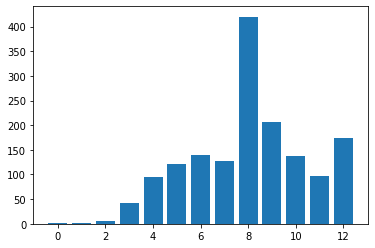

In [80]:
plt.bar(*zip(*dict(Counter(human1_score)).items()))
plt.show()

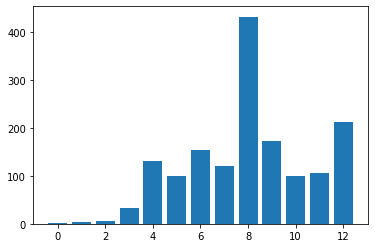

In [81]:
plt.bar(*zip(*dict(Counter(human2_score)).items()))
plt.show()

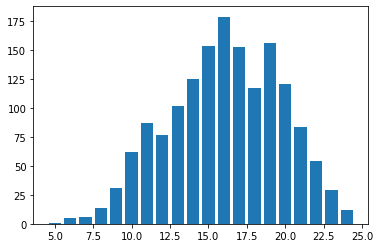

In [82]:
plt.bar(*zip(*dict(Counter(model_score)).items()))
plt.show()

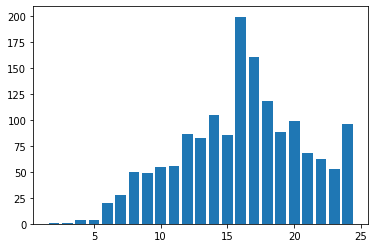

In [83]:
plt.bar(*zip(*dict(Counter(y)).items()))
plt.show()

c:\users\20167947\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


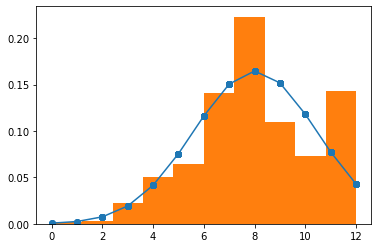

In [84]:
import pylab as pl
import scipy.stats as stats

fit = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed

pl.plot(a,fit,'-o')

pl.hist(a,normed=True)      #use this to draw histogram of your data

pl.show() 

## Studying model behaviour

### 1. Answer Length

In [14]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
answer_length = x[:,0]

In [15]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(answer_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Answer Length)' % corr)

Pearson's correlation Human-1 : 0.572  (Answer Length)
Pearson's correlation Human-2 : 0.590  (Answer Length)
Pearson's correlation Model : 0.780  (Answer Length)


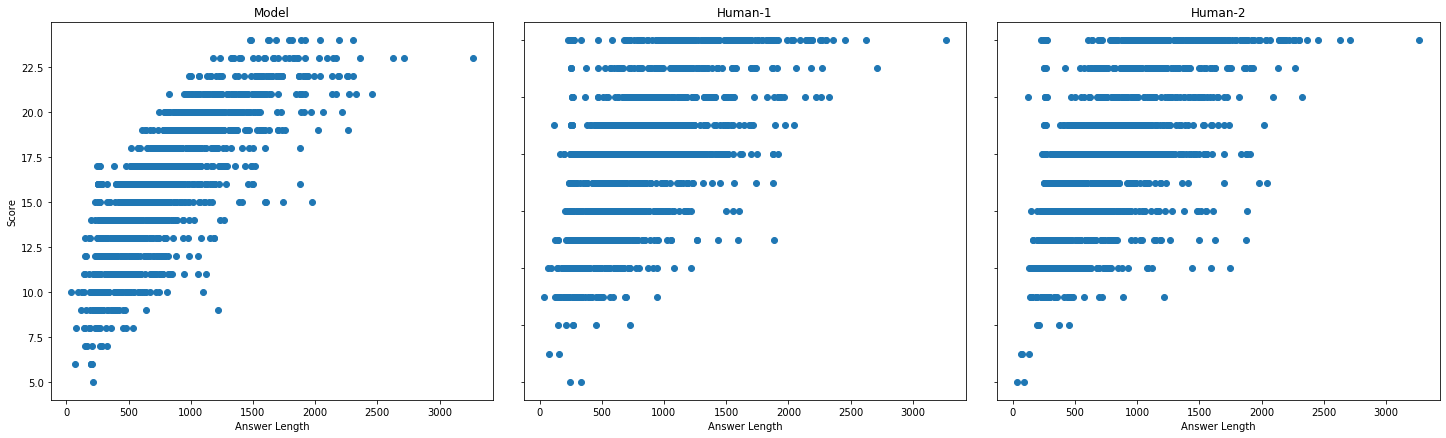

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(answer_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(answer_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(answer_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Answer Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('answer_length.png', bbox_inches="tight")

### 2. Word Counts

In [16]:
word_count = x[:,1]

In [17]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(word_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Word Count)' % corr)

Pearson's correlation Human-1 : 0.573  (Word Count)
Pearson's correlation Human-2 : 0.595  (Word Count)
Pearson's correlation Model : 0.786  (Word Count)


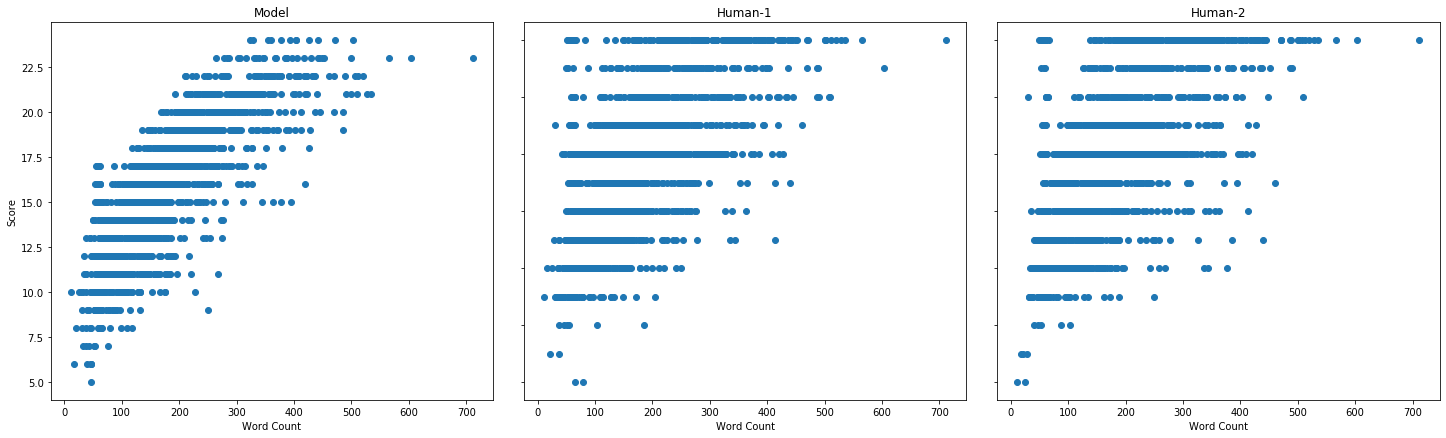

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(word_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(word_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(word_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Word Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('word_count.png', bbox_inches="tight")

### 3. Average Word Length

In [19]:
avg_word_length = x[:,2]

In [20]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(avg_word_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Average Word Length)' % corr)

Pearson's correlation Human-1 : 0.234  (Average Word Length)
Pearson's correlation Human-2 : 0.233  (Average Word Length)
Pearson's correlation Model : 0.247  (Average Word Length)


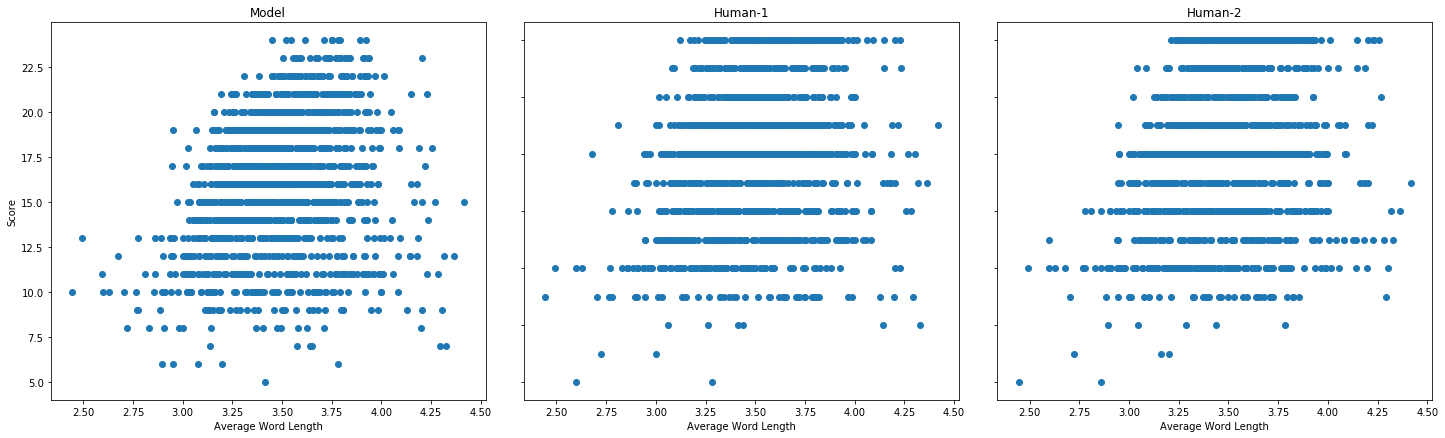

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(avg_word_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(avg_word_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(avg_word_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Average Word Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('avg_word_length.png', bbox_inches="tight")

### 4. Good n-gram

In [21]:
good_ngram = x[:,3]

In [22]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(good_ngram, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, model_score)
print('Pearson\'s correlation Model : %.3f  (Good n-gram)' % corr)

Pearson's correlation Human-1 : 0.574  (Good n-gram)
Pearson's correlation Human-2 : 0.596  (Good n-gram)
Pearson's correlation Model : 0.787  (Good n-gram)


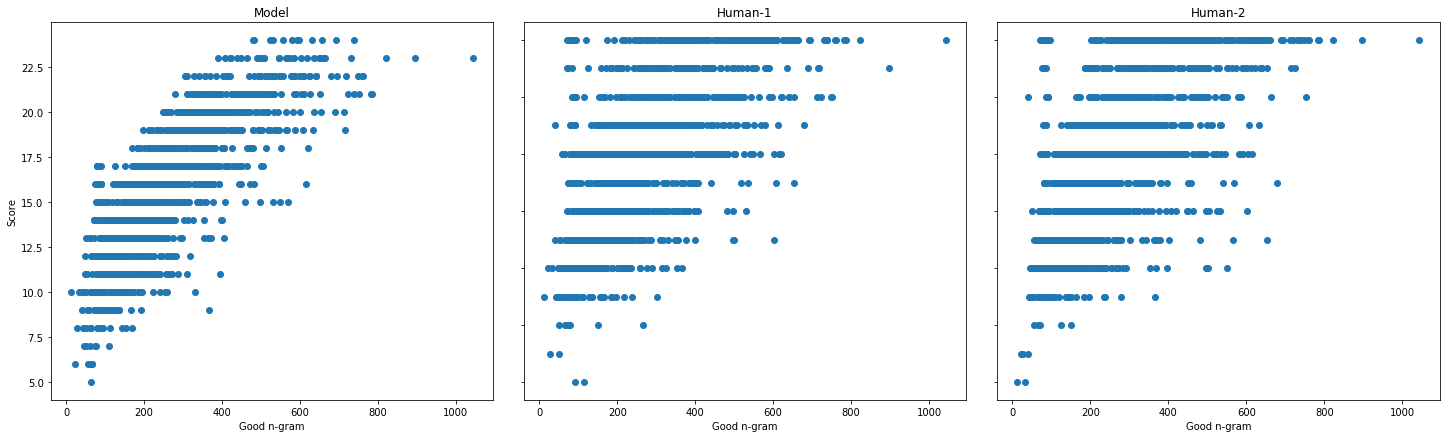

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(good_ngram, model_score)
axs[0].set_title('Model')
axs[1].scatter(good_ngram, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(good_ngram, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Good n-gram', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('good_ngram.png', bbox_inches="tight")

### 5. Prompt Overlap

In [23]:
prompt_overlap = x[:,4]

Pearson's correlation Human-1 : 0.530  (Prompt Overlap)
Pearson's correlation Human-2 : 0.539  (Prompt Overlap)
Pearson's correlation Model : 0.727  (Prompt Overlap)


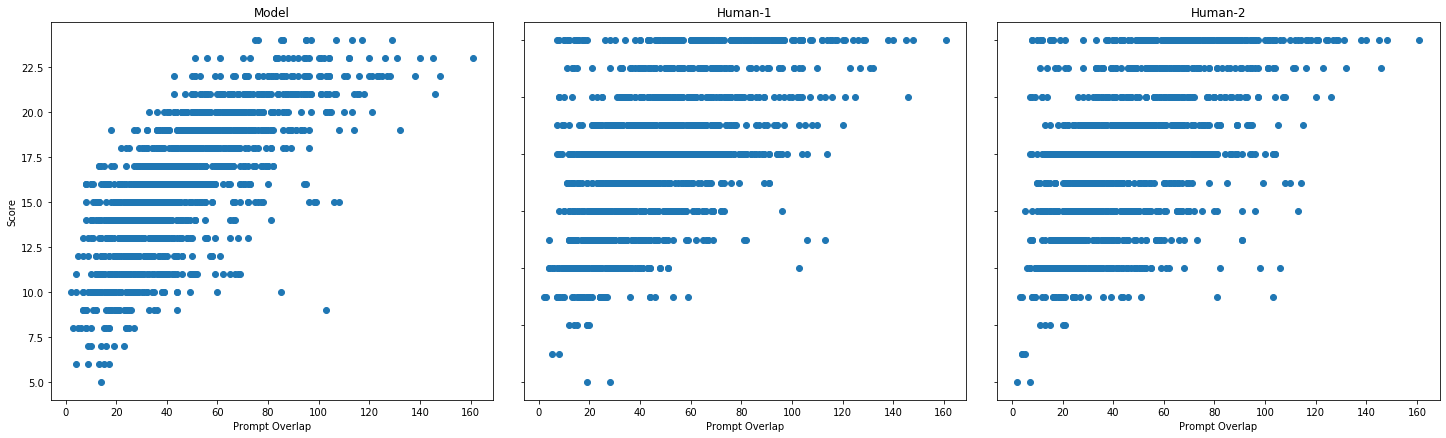

In [24]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap.png', bbox_inches="tight")

### 6. Prompt Overlap (synonym)

In [25]:
prompt_overlap_syn = x[:,5]

Pearson's correlation Human-1 : 0.397  (Prompt Overlap Synonym)
Pearson's correlation Human-2 : 0.408  (Prompt Overlap Synonym)
Pearson's correlation Model : 0.569  (Prompt Overlap Synonym)


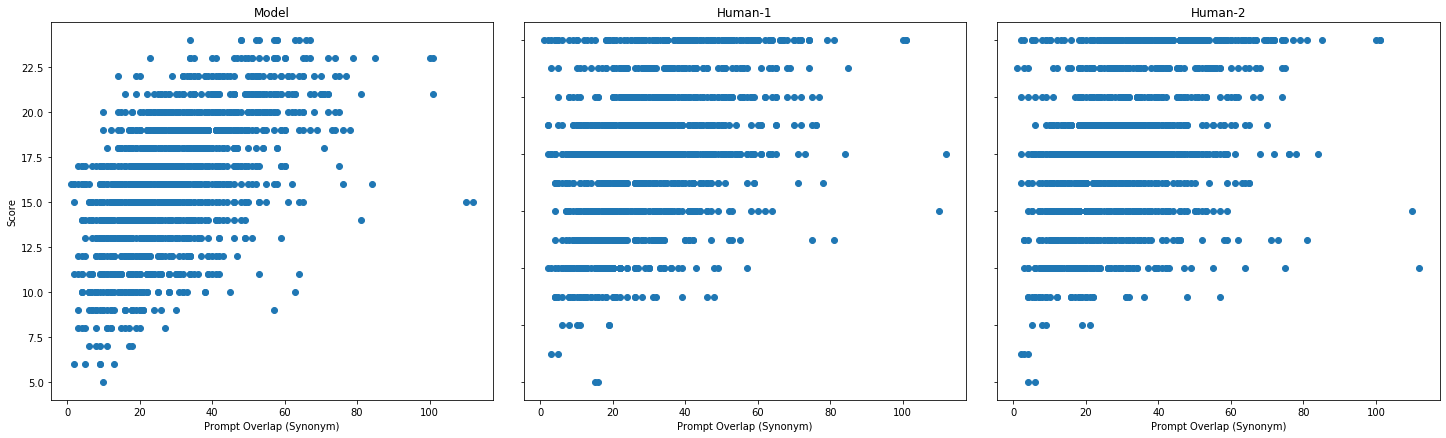

In [26]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap_syn, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap Synonym)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap_syn, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap_syn, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap_syn, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap (Synonym)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap_syn.png', bbox_inches="tight")

### 7. Punctuation Counts

In [27]:
punc_count = x[:,6]

Pearson's correlation Human-1 : 0.509  (Punctuation Count)
Pearson's correlation Human-2 : 0.537  (Punctuation Count)
Pearson's correlation Model : 0.674  (Punctuation Count)


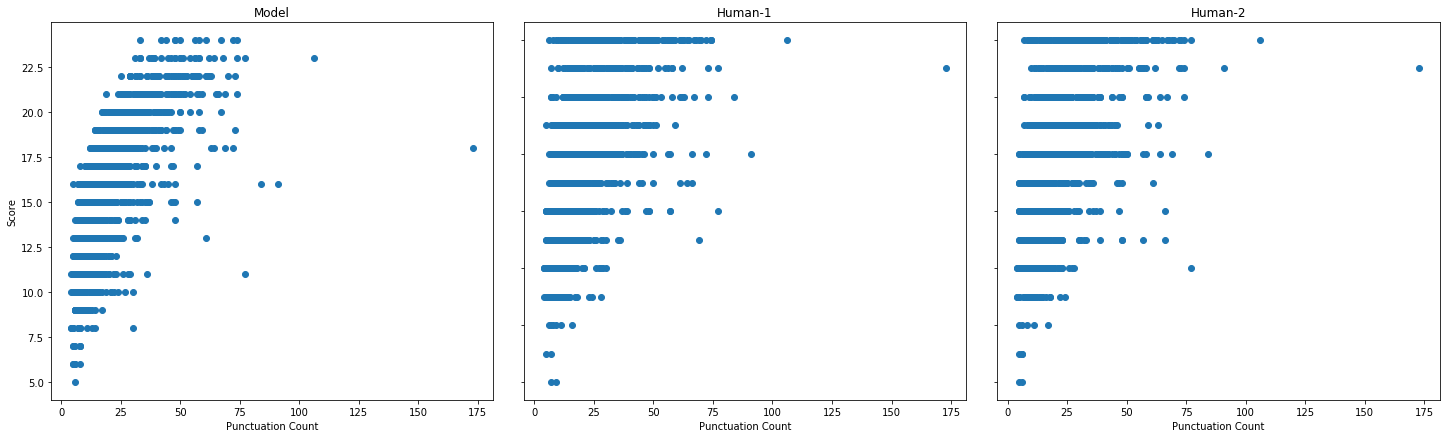

In [28]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(punc_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Punctuation Count)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(punc_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(punc_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(punc_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Punctuation Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('punc_count.png', bbox_inches="tight")

### 8. Spelling Error

In [29]:
spelling_error = x[:,7]

In [30]:
spelling_error

array([0.06060606, 0.0952381 , 0.05454545, ..., 0.02061856, 0.02793296,
       0.0106383 ])

Pearson's correlation Human-1 : -0.278  (Spelling Error)
Pearson's correlation Human-2 : -0.293  (Spelling Error)
Pearson's correlation Model : -0.359  (Spelling Error)


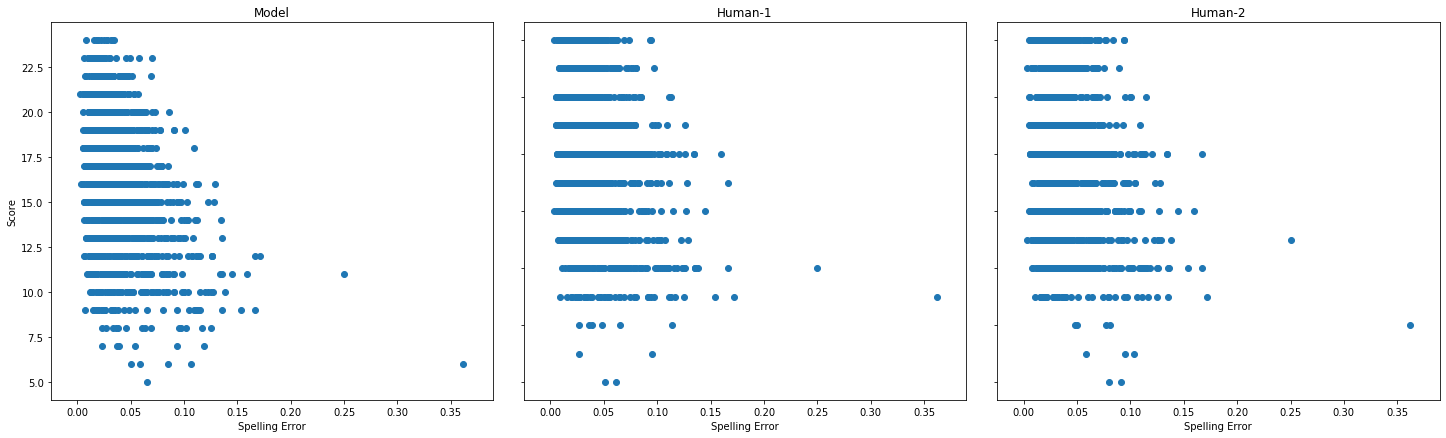

In [31]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(spelling_error, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, model_score)
print('Pearson\'s correlation Model : %.3f  (Spelling Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(spelling_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(spelling_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(spelling_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Spelling Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('spelling_error.png', bbox_inches="tight")

### 9. Unique Words

In [32]:
unique_words = x[:,8]
unique_words

array([ 53.,  52.,  84., ...,  92., 138.,  74.])

Pearson's correlation Human-1 : 0.608  (Unique Words)
Pearson's correlation Human-2 : 0.631  (Unique Words)
Pearson's correlation Model : 0.816  (Unique Words)


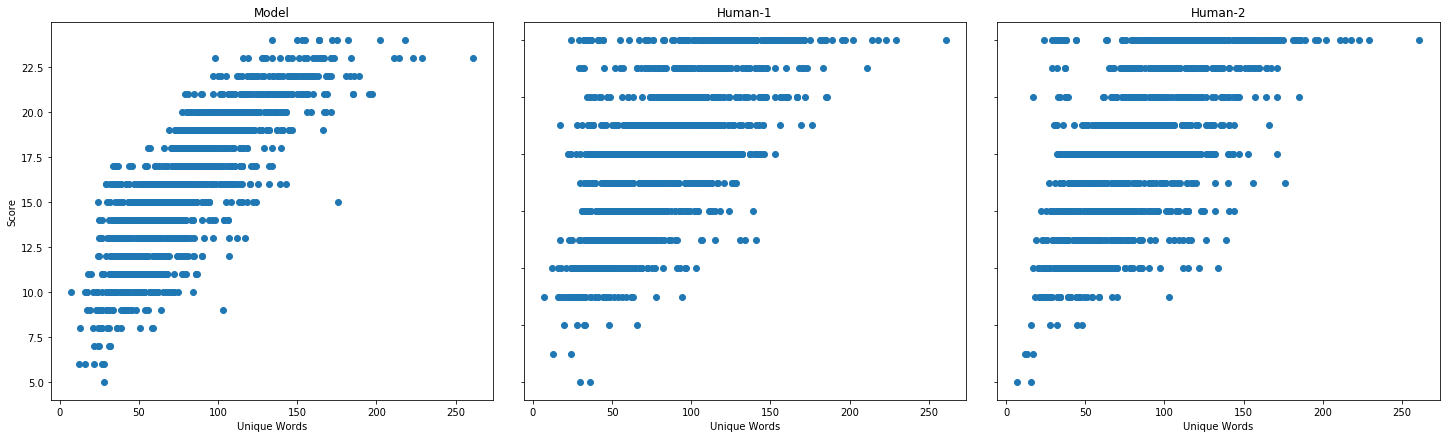

In [33]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(unique_words, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, model_score)
print('Pearson\'s correlation Model : %.3f  (Unique Words)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(unique_words, model_score)
axs[0].set_title('Model')
axs[1].scatter(unique_words, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(unique_words, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Unique Words', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('unique_words.png', bbox_inches="tight")

### 10. Prompt Similarity (SBert)

In [34]:
sbert_similarity = x[:,9]
sbert_similarity

array([0.54296809, 0.29765305, 0.11710557, ..., 0.63869965, 0.67122501,
       0.42861152])

Pearson's correlation Human-1: -0.024 (Prompt Similarity (SBert))
Pearson's correlation Human-2: -0.002 (Prompt Similarity (SBert))
Pearson's correlation Model: 0.005 (Prompt Similarity (SBert))


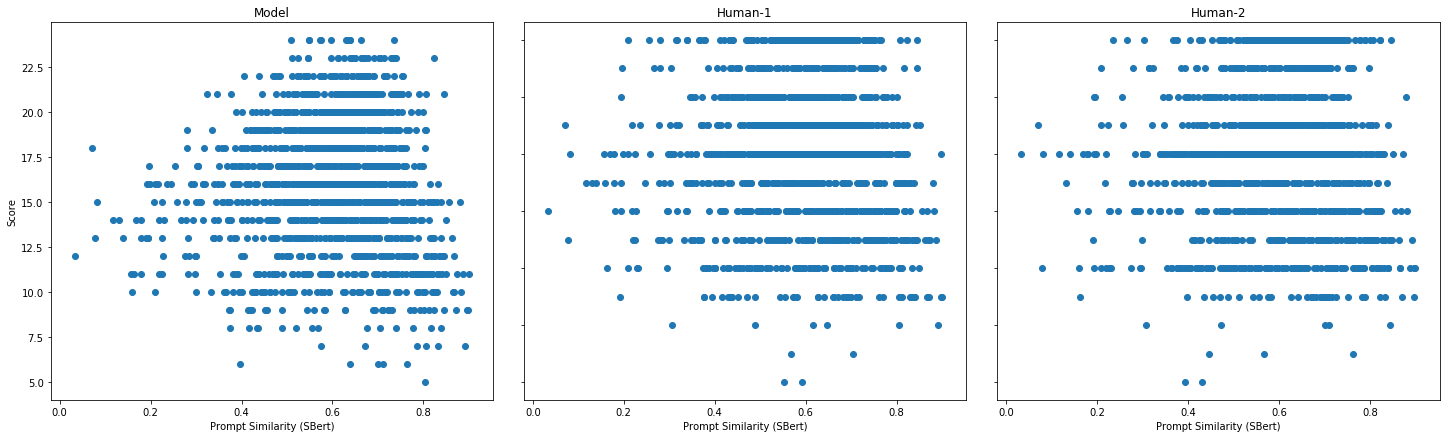

In [35]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(sbert_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (SBert))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(sbert_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(sbert_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(sbert_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (SBert)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('sbert_similarity.png', bbox_inches="tight")

### 11. Prompt Similarity (BOW)

In [36]:
bow_similarity = x[:,10]
bow_similarity

array([0.25155765, 0.30588765, 0.30956592, ..., 0.499033  , 0.24781269,
       0.17344788])

Pearson's correlation Human-1: 0.167 (Prompt Similarity (BOW))
Pearson's correlation Human-2: 0.150 (Prompt Similarity (BOW))
Pearson's correlation Model: 0.213 (Prompt Similarity (BOW))


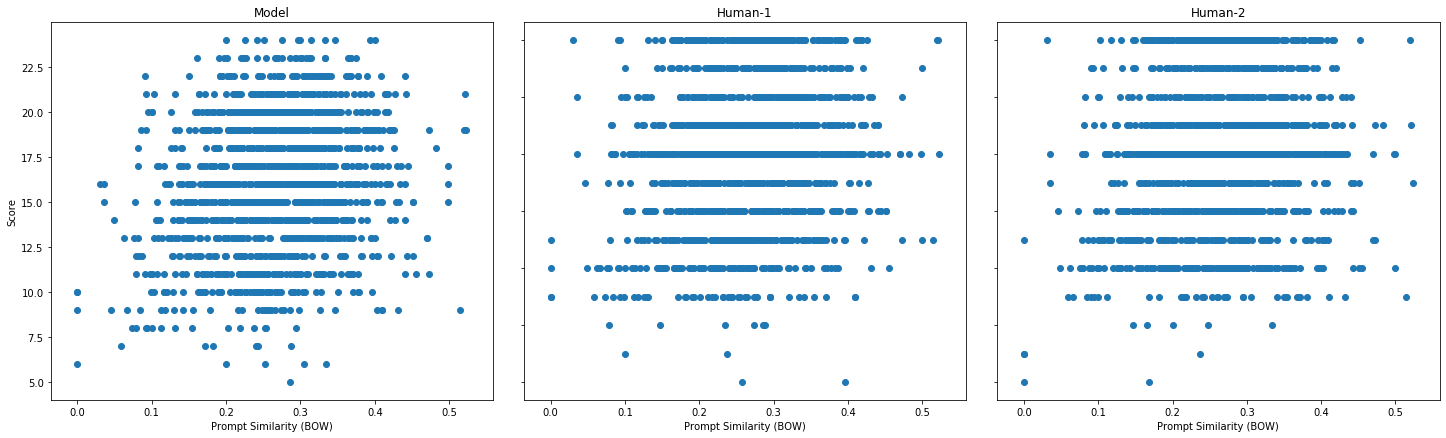

In [37]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bow_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (BOW))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(bow_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(bow_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(bow_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (BOW)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('bow_similarity.png', bbox_inches="tight")

### 12. Language Error

In [38]:
lang_error = x[:,11]
lang_error

array([0.04828974, 0.02350427, 0.02879581, ..., 0.00901917, 0.02018229,
       0.00261438])

Pearson's correlation Human-1: -0.153 (Language Error)
Pearson's correlation Human-2: -0.169 (Language Error)
Pearson's correlation Model: -0.196 (Language Error)


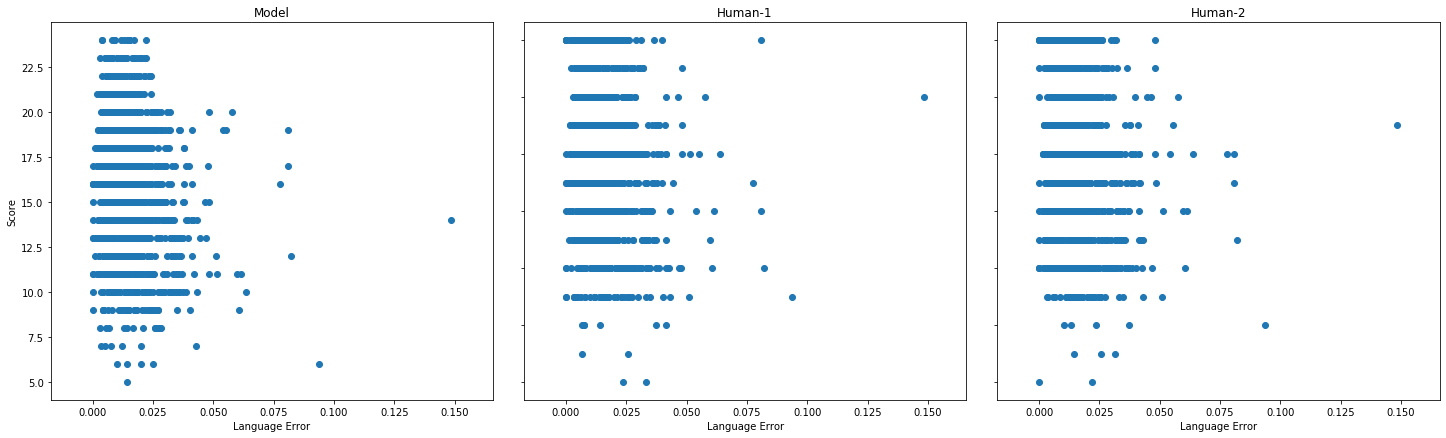

In [39]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(lang_error, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, model_score)
print('Pearson\'s correlation Model: %.3f (Language Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(lang_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(lang_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(lang_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Language Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('lang_error.png', bbox_inches="tight")